# Constants and libraries

In [1]:
'''
In this section one defines environment variables. 
Because I used this notebook on number of machines, I implemented class especially for this. 
You may not needed in one and use just simple definitions.
'''

from src.utils.system_variables import SystemVariables

# choose system according your current machine
# SYSTEM_NAME = "Windows"
# SYSTEM_NAME = "Colab"
# SYSTEM_NAME = "Kaggle"
SYSTEM_NAME = "Linux"

sv = SystemVariables(SYSTEM_NAME)
PROJECT_FOLDER = sv.get_project_folder()
SRC_FOLDER = sv.get_src_folder()
OUTPUT_FOLDER = sv.get_output_folder()
TUAB_DIRECTORY, TUAB_TRAIN, TUAB_EVAL = sv.get_TUAB_folders()
DEPR_ANON_DIRECTORY = sv.get_depr_anon_folder()
INHOUSE_DIRECTORY = sv.get_inhouse_folder()

print(SYSTEM_NAME)
print()

print(f"{PROJECT_FOLDER = }")
print(f"{SRC_FOLDER = }")
print(f"{OUTPUT_FOLDER = }")
print()

print(f"{TUAB_DIRECTORY = }")
print(f"{TUAB_TRAIN = }")
print(f"{TUAB_EVAL = }")
print()

print(f"{DEPR_ANON_DIRECTORY = }")
print()

print(f"{INHOUSE_DIRECTORY = }")
print()

Linux

PROJECT_FOLDER = ''
SRC_FOLDER = ''
OUTPUT_FOLDER = ''

TUAB_DIRECTORY = 'Data/TUAB/'
TUAB_TRAIN = 'Data/TUAB/train/normal/01_tcp_ar/'
TUAB_EVAL = 'Data/TUAB/eval/normal/01_tcp_ar/'

DEPR_ANON_DIRECTORY = 'Data/depression_anonymized/'

INHOUSE_DIRECTORY = 'Data/inhouse_dataset/EEG_baseline_with_markers_cleaned/preprocessed_data/EEG_baseline/'



In [2]:
import warnings
warnings.simplefilter("ignore")

import os
import sys
import pickle
import json
import random
from IPython.display import display, clear_output
from tqdm.auto import tqdm as tqdm_auto
import mne
import pandas as pd
from tqdm.auto import tqdm

In [3]:
sys.path.append(SRC_FOLDER)

%load_ext autoreload
%autoreload 1
%aimport utils

from src.utils import DEFAULT_SEED
from src.utils.common import check_tags, remove_files
from src.data.data_reading import DataReader
from src.utils.plotting import dataset_hists
from src.data.data_preprocessing import preprocessDepressionAnonymizedData, preprocessInhouseDatasetData, preprocessTUABdata, getTUABdataset, save_preprocessed_data

# Data preview

In [4]:
def tree(data_dir, n_files=2):
    for dir, _, filenames in os.walk(data_dir):
        print(dir)
        for filename in filenames[:n_files]:
            print(os.path.join(dir, filename))

# tree(DEPR_ANON_DIRECTORY)

# tree(INHOUSE_DIRECTORY)

# tree(TUAB_DIRECTORY)
# raw = mne.io.read_raw_edf(TUAB_TRAIN + "/aaaaaaff_s002_t000.edf", preload=False)
# print(raw.ch_names, "\nDuration:", raw.times[-1]/60, "m")
# display(raw.info)
# raw.plot(n_channels=21, duration=100, scalings=100e-6, start=20);#.set_size_inches(5, 5, forward=True)

## Inhouse dataset

In [5]:
# import pandas as pd
# from tqdm import tqdm 

# for dir in ["Health/", "MDD/"]:
#     print(len(os.listdir(INHOUSE_DIRECTORY + dir)))
#     n_secs = 0
#     for file in tqdm(os.listdir(INHOUSE_DIRECTORY + dir)):
#         n_secs += len(pd.read_csv(INHOUSE_DIRECTORY + dir + file)) / 500
#     print(n_secs/len(os.listdir(INHOUSE_DIRECTORY + dir)), n_secs)

75


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 75/75 [00:14<00:00,  5.09it/s]


96.56 7242.0
74


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 74/74 [00:13<00:00,  5.36it/s]

95.1891891891892 7044.0


## Depression anonymized dataset

In [14]:
for dir in ["epoch_1/", "epoch_3/"]:
    print(len(os.listdir(DEPR_ANON_DIRECTORY + dir)))
    
    # path_file = pd.read_csv(DEPR_ANON_DIRECTORY + dir + 'path_file.csv')
    # print(path_file['target'].value_counts())

    n_secs = 0
    for file in tqdm(os.listdir(DEPR_ANON_DIRECTORY + dir)):
        if "path_file" in file or 'ipynb_checkpoints' in file:
            continue
        recording = pd.read_csv(DEPR_ANON_DIRECTORY + dir + file)
        n_secs += len(recording)/125
    print(n_secs/len(os.listdir(DEPR_ANON_DIRECTORY + dir)), n_secs)

89


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 89/89 [00:03<00:00, 27.70it/s]


60.0 5340.0
89


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 89/89 [00:03<00:00, 28.90it/s]

60.0 5340.0


# Data preprocessing and saving

### TUAB

In [ ]:
# #preprocess
# for n_secs in [1, 2, 4, 5, 10, 15, 30, 60]:
#     print(f"Processing files for {n_secs=}")
#     # picked_channels = ['EEG FZ-REF', 'EEG CZ-REF', 'EEG PZ-REF']
#     picked_channels = ['EEG O1-REF', 'EEG O2-REF', 'EEG T3-REF', 'EEG T4-REF']
#     picked_channels_tag = "o1_o2_t3_t4"
#     target_freq = 128
#     n_samples_per_chunk=target_freq*n_secs
    
#     chunks_file_name = f"chunks{picked_channels_tag}_{len(picked_channels)}x{n_samples_per_chunk}"
#     targets_file_name = f"targets_{picked_channels_tag}_{len(picked_channels)}x{n_samples_per_chunk}"

#     remove_files(TUAB_TRAIN, [chunks_file_name, targets_file_name])
#     remove_files(TUAB_EVAL, [chunks_file_name, targets_file_name]) 
    
#     preprocessTUABdata(
#         picked_channels, 
#         chunks_file_name, 
#         targets_file_name, 
#         TUAB_TRAIN, 
#         TUAB_EVAL, 
    
#         target_freq=target_freq,
#         n_samples_per_chunk=n_samples_per_chunk,
        
#         force_recompute=True,
#         is_save=True,
#         n_files=None,
#         n_chunks_max=None,
#     )
    
#     dataset = getTUABdataset(
#         TUAB_TRAIN, 
#         TUAB_EVAL, 
#         chunks_file_name, 
#         targets_file_name,
        
#         n_channels=len(picked_channels),
#         n_samples_per_chunk=n_samples_per_chunk,
#         val_size=0.1,
#         SEED=SEED,
#     )
    
#     save_preprocessed_data(
#         dataset, 
#         os.path.join(TUAB_DIRECTORY, picked_channels_tag, f"dataset_{target_freq}_{n_samples_per_chunk/target_freq:.1f}.pkl")
#     )

Processing files for n_secs=1
0 files was removed from Data/TUAB/train/normal/01_tcp_ar/
0 files was removed from Data/TUAB/eval/normal/01_tcp_ar/


  0%|▎                                                                                                                               | 3/1371 [00:14<1:48:32,  4.76s/it]

File aaaaanfk_s002_t000.edf was passed, passed files: 1, read files: 3
File aaaaapfd_s001_t001.edf was passed, passed files: 2, read files: 3
File aaaaaoql_s001_t001.edf was passed, passed files: 3, read files: 3


  1%|▉                                                                                                                              | 10/1371 [00:34<1:24:43,  3.73s/it]

File aaaaapos_s001_t000.edf was passed, passed files: 4, read files: 7


  1%|█                                                                                                                              | 12/1371 [00:39<1:10:03,  3.09s/it]

File aaaaapiy_s001_t001.edf was passed, passed files: 5, read files: 8


  1%|█▌                                                                                                                             | 17/1371 [00:56<1:19:49,  3.54s/it]

File aaaaaqap_s001_t000.edf was passed, passed files: 6, read files: 12


  1%|█▊                                                                                                                             | 19/1371 [01:01<1:08:10,  3.03s/it]

File aaaaanev_s001_t000.edf was passed, passed files: 7, read files: 13
File aaaaanfk_s001_t000.edf was passed, passed files: 8, read files: 13


  2%|██                                                                                                                               | 22/1371 [01:05<52:20,  2.33s/it]

File aaaaaohs_s001_t001.edf was passed, passed files: 9, read files: 14


  2%|██▎                                                                                                                              | 24/1371 [01:09<50:07,  2.23s/it]

File aaaaanfo_s001_t000.edf was passed, passed files: 10, read files: 15
File aaaaapww_s001_t000.edf was passed, passed files: 11, read files: 15


  2%|██▋                                                                                                                              | 28/1371 [01:17<49:38,  2.22s/it]

File aaaaanln_s001_t000.edf was passed, passed files: 12, read files: 17


  2%|██▉                                                                                                                            | 32/1371 [01:31<1:07:06,  3.01s/it]

File aaaaanax_s001_t000.edf was passed, passed files: 13, read files: 20
File aaaaamzw_s001_t000.edf was passed, passed files: 14, read files: 20
File aaaaaojz_s001_t000.edf was passed, passed files: 15, read files: 20


  3%|███▍                                                                                                                             | 36/1371 [01:35<42:35,  1.91s/it]

File aaaaangl_s001_t000.edf was passed, passed files: 16, read files: 21
File aaaaamcf_s002_t000.edf was passed, passed files: 17, read files: 21


  3%|███▊                                                                                                                             | 40/1371 [01:43<45:51,  2.07s/it]

File aaaaaogf_s001_t000.edf was passed, passed files: 18, read files: 23


  3%|███▉                                                                                                                             | 42/1371 [01:47<46:02,  2.08s/it]

File aaaaabcl_s002_t000.edf was passed, passed files: 19, read files: 24
File aaaaamys_s001_t000.edf was passed, passed files: 20, read files: 24
File aaaaaptk_s001_t000.edf was passed, passed files: 21, read files: 24


  4%|████▌                                                                                                                            | 48/1371 [02:00<51:44,  2.35s/it]

File aaaaaodb_s001_t000.edf was passed, passed files: 22, read files: 27
File aaaaapif_s001_t000.edf was passed, passed files: 23, read files: 27


  4%|████▉                                                                                                                            | 52/1371 [02:07<45:47,  2.08s/it]

File aaaaanmi_s001_t000.edf was passed, passed files: 24, read files: 29


  4%|█████                                                                                                                            | 54/1371 [02:11<45:12,  2.06s/it]

File aaaaapog_s001_t000.edf was passed, passed files: 25, read files: 30


  4%|█████▎                                                                                                                         | 58/1371 [02:23<1:00:43,  2.78s/it]

File aaaaamob_s001_t000.edf was passed, passed files: 26, read files: 33


  5%|█████▉                                                                                                                         | 64/1371 [02:46<1:23:37,  3.84s/it]

File aaaaamhh_s002_t000.edf was passed, passed files: 27, read files: 38


  5%|██████▏                                                                                                                        | 67/1371 [02:54<1:14:06,  3.41s/it]

File aaaaanbc_s001_t000.edf was passed, passed files: 28, read files: 40


  5%|██████▌                                                                                                                        | 71/1371 [03:07<1:13:43,  3.40s/it]

File aaaaapbe_s001_t000.edf was passed, passed files: 29, read files: 43
File aaaaangg_s001_t001.edf was passed, passed files: 30, read files: 43
File aaaaapeo_s001_t000.edf was passed, passed files: 31, read files: 43
File aaaaanvi_s001_t000.edf was passed, passed files: 32, read files: 43


  6%|███████▏                                                                                                                         | 77/1371 [03:15<45:53,  2.13s/it]

File aaaaaoqq_s001_t000.edf was passed, passed files: 33, read files: 45
File aaaaapob_s001_t002.edf was passed, passed files: 34, read files: 45
File aaaaamqr_s001_t000.edf was passed, passed files: 35, read files: 45


  6%|███████▋                                                                                                                         | 82/1371 [03:26<49:37,  2.31s/it]

File aaaaapip_s001_t000.edf was passed, passed files: 36, read files: 47


  6%|████████                                                                                                                       | 87/1371 [03:42<1:08:46,  3.21s/it]

File aaaaaowm_s001_t000.edf was passed, passed files: 37, read files: 51
File aaaaanfd_s001_t000.edf was passed, passed files: 38, read files: 51
File aaaaappl_s001_t002.edf was passed, passed files: 39, read files: 51


  7%|████████▌                                                                                                                        | 91/1371 [03:45<39:00,  1.83s/it]

File aaaaamsf_s001_t000.edf was passed, passed files: 40, read files: 52
File aaaaapme_s001_t001.edf was passed, passed files: 41, read files: 52


  7%|████████▉                                                                                                                        | 95/1371 [03:53<42:29,  2.00s/it]

File aaaaappc_s001_t001.edf was passed, passed files: 42, read files: 54
File aaaaagwc_s002_t001.edf was passed, passed files: 43, read files: 54


  7%|█████████▎                                                                                                                    | 102/1371 [04:14<1:06:49,  3.16s/it]

File aaaaaovj_s001_t000.edf was passed, passed files: 44, read files: 59


  8%|█████████▋                                                                                                                      | 104/1371 [04:18<56:55,  2.70s/it]

File aaaaalsz_s003_t000.edf was passed, passed files: 45, read files: 60


  8%|█████████▉                                                                                                                      | 107/1371 [04:26<59:33,  2.83s/it]

File aaaaakhy_s002_t000.edf was passed, passed files: 46, read files: 62


  8%|██████████                                                                                                                    | 110/1371 [04:35<1:00:07,  2.86s/it]

File aaaaapvr_s001_t000.edf was passed, passed files: 47, read files: 64


  8%|██████████▍                                                                                                                     | 112/1371 [04:39<53:47,  2.56s/it]

File aaaaagzp_s002_t000.edf was passed, passed files: 48, read files: 65
File aaaaaenj_s002_t002.edf was passed, passed files: 49, read files: 65
File aaaaaoep_s001_t000.edf was passed, passed files: 50, read files: 65


  8%|██████████▊                                                                                                                     | 116/1371 [04:44<38:48,  1.86s/it]

File aaaaamti_s002_t000.edf was passed, passed files: 51, read files: 66
File aaaaapkb_s001_t000.edf was passed, passed files: 52, read files: 66


  9%|███████████                                                                                                                     | 119/1371 [04:48<35:33,  1.70s/it]

File aaaaapwx_s001_t000.edf was passed, passed files: 53, read files: 67


  9%|███████████▍                                                                                                                    | 122/1371 [04:57<45:42,  2.20s/it]

File aaaaammq_s002_t000.edf was passed, passed files: 54, read files: 69
File aaaaamzv_s001_t000.edf was passed, passed files: 55, read files: 69
File aaaaapbf_s001_t000.edf was passed, passed files: 56, read files: 69


  9%|███████████▊                                                                                                                    | 126/1371 [05:01<35:59,  1.73s/it]

File aaaaaplm_s001_t000.edf was passed, passed files: 57, read files: 70


 10%|████████████▏                                                                                                                 | 132/1371 [05:24<1:08:50,  3.33s/it]

File aaaaapvh_s001_t001.edf was passed, passed files: 58, read files: 75
File aaaaanzv_s001_t000.edf was passed, passed files: 59, read files: 75


 10%|████████████▋                                                                                                                   | 136/1371 [05:32<57:02,  2.77s/it]

File aaaaaohg_s001_t001.edf was passed, passed files: 60, read files: 77


 10%|████████████▉                                                                                                                   | 139/1371 [05:40<56:58,  2.77s/it]

File aaaaapgd_s001_t000.edf was passed, passed files: 61, read files: 79
File aaaaakyn_s002_t000.edf was passed, passed files: 62, read files: 79


 10%|█████████████▎                                                                                                                  | 142/1371 [05:44<43:06,  2.10s/it]

File aaaaaimz_s003_t000.edf was passed, passed files: 63, read files: 80


 11%|█████████████▌                                                                                                                  | 145/1371 [05:53<53:05,  2.60s/it]

File aaaaanrx_s001_t000.edf was passed, passed files: 64, read files: 82
File aaaaapok_s001_t001.edf was passed, passed files: 65, read files: 82
File aaaaapgm_s001_t000.edf was passed, passed files: 66, read files: 82


 11%|██████████████                                                                                                                  | 150/1371 [06:02<45:31,  2.24s/it]

File aaaaankh_s002_t000.edf was passed, passed files: 67, read files: 84


 11%|██████████████▏                                                                                                                 | 152/1371 [06:06<44:24,  2.19s/it]

File aaaaapch_s001_t001.edf was passed, passed files: 68, read files: 85
File aaaaaibr_s005_t000.edf was passed, passed files: 69, read files: 85
File aaaaapwv_s001_t000.edf was passed, passed files: 70, read files: 85
File aaaaalzz_s002_t000.edf was passed, passed files: 71, read files: 85
File aaaaapyi_s001_t000.edf was passed, passed files: 72, read files: 85
File aaaaapva_s001_t000.edf was passed, passed files: 73, read files: 85


 12%|██████████████▉                                                                                                                 | 160/1371 [06:15<32:03,  1.59s/it]

File aaaaampm_s002_t000.edf was passed, passed files: 74, read files: 87


 12%|███████████████▏                                                                                                                | 163/1371 [06:24<41:29,  2.06s/it]

File aaaaaoqp_s001_t000.edf was passed, passed files: 75, read files: 89


 12%|███████████████▍                                                                                                                | 166/1371 [06:33<52:35,  2.62s/it]

File aaaaapjz_s001_t000.edf was passed, passed files: 76, read files: 91


 12%|███████████████▋                                                                                                                | 168/1371 [06:37<48:56,  2.44s/it]

File aaaaapuv_s001_t000.edf was passed, passed files: 77, read files: 92
File aaaaaosa_s001_t000.edf was passed, passed files: 78, read files: 92


 12%|███████████████▉                                                                                                                | 171/1371 [06:42<40:01,  2.00s/it]

File aaaaapie_s001_t000.edf was passed, passed files: 79, read files: 93


 13%|████████████████▎                                                                                                             | 177/1371 [07:03<1:08:35,  3.45s/it]

File aaaaamyl_s001_t000.edf was passed, passed files: 80, read files: 98


 13%|████████████████▋                                                                                                             | 181/1371 [07:22<1:29:34,  4.52s/it]

File aaaaansu_s002_t000.edf was passed, passed files: 81, read files: 101
File aaaaaddw_s002_t000.edf was passed, passed files: 82, read files: 101


 14%|█████████████████▏                                                                                                            | 187/1371 [07:39<1:09:22,  3.52s/it]

File aaaaalwb_s003_t000.edf was passed, passed files: 83, read files: 105
File aaaaaohh_s001_t000.edf was passed, passed files: 84, read files: 105
File aaaaapqu_s001_t000.edf was passed, passed files: 85, read files: 105
File aaaaaixl_s005_t000.edf was passed, passed files: 86, read files: 105


 14%|██████████████████                                                                                                              | 194/1371 [07:51<50:42,  2.59s/it]

File aaaaakbi_s002_t000.edf was passed, passed files: 87, read files: 108
File aaaaapto_s001_t000.edf was passed, passed files: 88, read files: 108


 14%|██████████████████▍                                                                                                             | 198/1371 [08:00<47:51,  2.45s/it]

File aaaaapvq_s001_t000.edf was passed, passed files: 89, read files: 110
File aaaaambs_s003_t000.edf was passed, passed files: 90, read files: 110
File aaaaajvi_s004_t000.edf was passed, passed files: 91, read files: 110
File aaaaapce_s001_t001.edf was passed, passed files: 92, read files: 110
File aaaaaoqm_s001_t000.edf was passed, passed files: 93, read files: 110
File aaaaaler_s003_t000.edf was passed, passed files: 94, read files: 110


 15%|███████████████████▎                                                                                                            | 207/1371 [08:13<38:23,  1.98s/it]

File aaaaalvl_s002_t000.edf was passed, passed files: 95, read files: 113


 15%|███████████████████▍                                                                                                          | 212/1371 [08:30<1:01:55,  3.21s/it]

File aaaaamux_s001_t000.edf was passed, passed files: 96, read files: 117
File aaaaappt_s002_t000.edf was passed, passed files: 97, read files: 117


 16%|████████████████████                                                                                                            | 215/1371 [08:34<44:29,  2.31s/it]

File aaaaaoah_s001_t000.edf was passed, passed files: 98, read files: 118


 16%|████████████████████▎                                                                                                         | 221/1371 [08:56<1:07:10,  3.50s/it]

File aaaaamth_s002_t000.edf was passed, passed files: 99, read files: 123


 16%|████████████████████▊                                                                                                           | 223/1371 [09:00<55:39,  2.91s/it]

File aaaaamog_s001_t000.edf was passed, passed files: 100, read files: 124


 16%|█████████████████████                                                                                                           | 226/1371 [09:09<56:55,  2.98s/it]

File aaaaamyh_s001_t002.edf was passed, passed files: 101, read files: 126


 17%|█████████████████████▎                                                                                                          | 228/1371 [09:13<51:54,  2.73s/it]

File aaaaansm_s001_t000.edf was passed, passed files: 102, read files: 127


 17%|█████████████████████▍                                                                                                        | 233/1371 [09:30<1:06:34,  3.51s/it]

File aaaaaniv_s001_t000.edf was passed, passed files: 103, read files: 131
File aaaaafyj_s002_t000.edf was passed, passed files: 104, read files: 131


 17%|█████████████████████▊                                                                                                        | 237/1371 [09:44<1:08:00,  3.60s/it]

File aaaaaeph_s005_t000.edf was passed, passed files: 105, read files: 133
File aaaaapji_s001_t000.edf was passed, passed files: 106, read files: 133
File aaaaanon_s001_t000.edf was passed, passed files: 107, read files: 133


 18%|██████████████████████▋                                                                                                         | 243/1371 [09:57<52:32,  2.79s/it]

File aaaaapus_s001_t000.edf was passed, passed files: 108, read files: 136
File aaaaanah_s001_t000.edf was passed, passed files: 109, read files: 136


 18%|██████████████████████▉                                                                                                         | 246/1371 [10:01<40:45,  2.17s/it]

File aaaaapxk_s001_t000.edf was passed, passed files: 110, read files: 137


 18%|███████████████████████▎                                                                                                        | 250/1371 [10:13<52:38,  2.82s/it]

File aaaaamvq_s001_t000.edf was passed, passed files: 111, read files: 140
File aaaaakzu_s003_t000.edf was passed, passed files: 112, read files: 140


 19%|███████████████████████▊                                                                                                        | 255/1371 [10:25<51:37,  2.78s/it]

File aaaaapws_s001_t000.edf was passed, passed files: 113, read files: 143


 19%|████████████████████████                                                                                                        | 258/1371 [10:34<54:08,  2.92s/it]

File aaaaamrf_s001_t000.edf was passed, passed files: 114, read files: 145
File aaaaapgl_s001_t000.edf was passed, passed files: 115, read files: 145


 19%|████████████████████████▎                                                                                                       | 261/1371 [10:38<40:11,  2.17s/it]

File aaaaanat_s001_t000.edf was passed, passed files: 116, read files: 146
File aaaaaltg_s002_t000.edf was passed, passed files: 117, read files: 146
File aaaaaoff_s001_t000.edf was passed, passed files: 118, read files: 146


 20%|█████████████████████████                                                                                                       | 268/1371 [10:54<49:13,  2.68s/it]

File aaaaamnh_s001_t000.edf was passed, passed files: 119, read files: 150


 20%|█████████████████████████▏                                                                                                      | 270/1371 [10:58<44:38,  2.43s/it]

File aaaaaoes_s001_t000.edf was passed, passed files: 120, read files: 151


 20%|█████████████████████████▍                                                                                                      | 273/1371 [11:07<50:45,  2.77s/it]

File aaaaaoid_s002_t000.edf was passed, passed files: 121, read files: 153
File aaaaapia_s001_t000.edf was passed, passed files: 122, read files: 153
File aaaaapfu_s001_t000.edf was passed, passed files: 123, read files: 153


 20%|██████████████████████████                                                                                                      | 279/1371 [11:20<48:15,  2.65s/it]

File aaaaamzs_s001_t000.edf was passed, passed files: 124, read files: 156


 20%|██████████████████████████▏                                                                                                     | 281/1371 [11:24<43:34,  2.40s/it]

File aaaaamvl_s001_t000.edf was passed, passed files: 125, read files: 157


 21%|██████████████████████████▍                                                                                                   | 288/1371 [11:48<1:04:20,  3.56s/it]

File aaaaanif_s001_t000.edf was passed, passed files: 126, read files: 163
File aaaaanrw_s001_t000.edf was passed, passed files: 127, read files: 163
File aaaaanix_s001_t000.edf was passed, passed files: 128, read files: 163


 21%|███████████████████████████▎                                                                                                    | 292/1371 [11:53<38:52,  2.16s/it]

File aaaaamxu_s001_t000.edf was passed, passed files: 129, read files: 164


 22%|███████████████████████████▊                                                                                                    | 298/1371 [12:13<58:57,  3.30s/it]

File aaaaanaj_s001_t000.edf was passed, passed files: 130, read files: 169


 22%|████████████████████████████                                                                                                    | 300/1371 [12:18<52:44,  2.96s/it]

File aaaaanuq_s001_t000.edf was passed, passed files: 131, read files: 170
File aaaaalrt_s002_t000.edf was passed, passed files: 132, read files: 170
File aaaaanez_s001_t000.edf was passed, passed files: 133, read files: 170
File aaaaapqs_s001_t000.edf was passed, passed files: 134, read files: 170


 22%|████████████████████████████▍                                                                                                   | 305/1371 [12:22<29:47,  1.68s/it]

File aaaaalad_s002_t000.edf was passed, passed files: 135, read files: 171


 22%|████████████████████████████▋                                                                                                   | 307/1371 [12:25<30:57,  1.75s/it]

File aaaaanwe_s002_t000.edf was passed, passed files: 136, read files: 172


 23%|█████████████████████████████                                                                                                   | 311/1371 [12:38<43:25,  2.46s/it]

File aaaaaosj_s001_t000.edf was passed, passed files: 137, read files: 175


 23%|█████████████████████████████▏                                                                                                | 318/1371 [13:03<1:05:37,  3.74s/it]

File aaaaapqz_s001_t000.edf was passed, passed files: 138, read files: 181
File aaaaamtl_s002_t000.edf was passed, passed files: 139, read files: 181


 23%|█████████████████████████████▉                                                                                                  | 321/1371 [13:07<42:58,  2.46s/it]

File aaaaapum_s001_t000.edf was passed, passed files: 140, read files: 182


 24%|██████████████████████████████▏                                                                                                 | 324/1371 [13:15<47:32,  2.72s/it]

File aaaaapri_s001_t000.edf was passed, passed files: 141, read files: 184


 24%|██████████████████████████████▍                                                                                               | 331/1371 [13:40<1:02:34,  3.61s/it]

File aaaaapom_s001_t000.edf was passed, passed files: 142, read files: 190
File aaaaamti_s001_t000.edf was passed, passed files: 143, read files: 190


 24%|███████████████████████████████▏                                                                                                | 334/1371 [13:44<41:58,  2.43s/it]

File aaaaaoxj_s001_t000.edf was passed, passed files: 144, read files: 191
File aaaaapmg_s001_t000.edf was passed, passed files: 145, read files: 191
File aaaaapsx_s001_t000.edf was passed, passed files: 146, read files: 191


 25%|████████████████████████████████                                                                                                | 343/1371 [14:08<54:44,  3.19s/it]

File aaaaaplt_s001_t000.edf was passed, passed files: 147, read files: 197


 25%|████████████████████████████████▏                                                                                               | 345/1371 [14:12<47:07,  2.76s/it]

File aaaaapgc_s001_t000.edf was passed, passed files: 148, read files: 198
File aaaaakzx_s003_t001.edf was passed, passed files: 149, read files: 198


 25%|████████████████████████████████▌                                                                                               | 349/1371 [14:20<42:14,  2.48s/it]

File aaaaappw_s001_t001.edf was passed, passed files: 150, read files: 200
File aaaaamzc_s001_t000.edf was passed, passed files: 151, read files: 200


 26%|████████████████████████████████▊                                                                                               | 352/1371 [14:25<34:59,  2.06s/it]

File aaaaaobw_s001_t000.edf was passed, passed files: 152, read files: 201


 26%|█████████████████████████████████▏                                                                                              | 355/1371 [14:33<41:51,  2.47s/it]

File aaaaajyg_s002_t000.edf was passed, passed files: 153, read files: 203
File aaaaaowr_s001_t001.edf was passed, passed files: 154, read files: 203
File aaaaamwr_s001_t000.edf was passed, passed files: 155, read files: 203


 26%|█████████████████████████████████▋                                                                                              | 361/1371 [14:46<42:09,  2.50s/it]

File aaaaapig_s001_t000.edf was passed, passed files: 156, read files: 206


 27%|██████████████████████████████████                                                                                            | 370/1371 [15:17<1:03:37,  3.81s/it]

File aaaaaouv_s001_t000.edf was passed, passed files: 157, read files: 214


 27%|███████████████████████████████████                                                                                             | 375/1371 [15:33<58:13,  3.51s/it]

File aaaaakxf_s002_t000.edf was passed, passed files: 158, read files: 218


 27%|███████████████████████████████████▏                                                                                            | 377/1371 [15:37<47:15,  2.85s/it]

File aaaaapcg_s001_t000.edf was passed, passed files: 159, read files: 219


 28%|███████████████████████████████████▋                                                                                            | 382/1371 [15:54<55:55,  3.39s/it]

File aaaaapiq_s001_t000.edf was passed, passed files: 160, read files: 223


 28%|████████████████████████████████████                                                                                            | 386/1371 [16:07<57:11,  3.48s/it]

File aaaaaosb_s002_t001.edf was passed, passed files: 161, read files: 226
File aaaaaocs_s001_t000.edf was passed, passed files: 162, read files: 226


 28%|████████████████████████████████████▍                                                                                           | 390/1371 [16:15<45:08,  2.76s/it]

File aaaaaflb_s005_t000.edf was passed, passed files: 163, read files: 228


 29%|████████████████████████████████████▌                                                                                           | 392/1371 [16:21<44:56,  2.75s/it]

File aaaaamsw_s002_t000.edf was passed, passed files: 164, read files: 229
File aaaaaosn_s001_t000.edf was passed, passed files: 165, read files: 229
File aaaaankk_s001_t000.edf was passed, passed files: 166, read files: 229
File aaaaapdl_s001_t000.edf was passed, passed files: 167, read files: 229


 29%|█████████████████████████████████████                                                                                           | 397/1371 [16:25<27:04,  1.67s/it]

File aaaaanil_s001_t000.edf was passed, passed files: 168, read files: 230


 29%|█████████████████████████████████████▋                                                                                          | 403/1371 [16:46<50:19,  3.12s/it]

File aaaaantg_s001_t000.edf was passed, passed files: 169, read files: 235
File aaaaansy_s001_t000.edf was passed, passed files: 170, read files: 235


 30%|█████████████████████████████████████▉                                                                                          | 406/1371 [16:50<36:48,  2.29s/it]

File aaaaandn_s001_t000.edf was passed, passed files: 171, read files: 236
File aaaaaozm_s001_t000.edf was passed, passed files: 172, read files: 236


 30%|██████████████████████████████████████▏                                                                                         | 409/1371 [16:55<30:57,  1.93s/it]

File aaaaaoxi_s001_t000.edf was passed, passed files: 173, read files: 237


 30%|██████████████████████████████████████▌                                                                                         | 413/1371 [17:08<45:59,  2.88s/it]

File aaaaapvg_s001_t001.edf was passed, passed files: 174, read files: 240


 30%|██████████████████████████████████████▉                                                                                         | 417/1371 [17:21<50:49,  3.20s/it]

File aaaaanvy_s001_t001.edf was passed, passed files: 175, read files: 243


 31%|███████████████████████████████████████                                                                                         | 419/1371 [17:25<44:26,  2.80s/it]

File aaaaansh_s001_t000.edf was passed, passed files: 176, read files: 244
File aaaaaopm_s001_t000.edf was passed, passed files: 177, read files: 244


 31%|███████████████████████████████████████▋                                                                                        | 425/1371 [17:42<49:57,  3.17s/it]

File aaaaaozi_s001_t000.edf was passed, passed files: 178, read files: 248


 31%|███████████████████████████████████████▉                                                                                        | 428/1371 [17:50<45:20,  2.88s/it]

File aaaaanmv_s001_t000.edf was passed, passed files: 179, read files: 250


 32%|████████████████████████████████████████▍                                                                                       | 433/1371 [18:07<55:37,  3.56s/it]

File aaaaalby_s003_t000.edf was passed, passed files: 180, read files: 254
File aaaaamqb_s001_t000.edf was passed, passed files: 181, read files: 254
File aaaaapnf_s001_t001.edf was passed, passed files: 182, read files: 254


 32%|████████████████████████████████████████▊                                                                                       | 437/1371 [18:11<32:58,  2.12s/it]

File aaaaaogq_s001_t000.edf was passed, passed files: 183, read files: 255


 32%|█████████████████████████████████████████                                                                                       | 440/1371 [18:19<37:39,  2.43s/it]

File aaaaamww_s001_t000.edf was passed, passed files: 184, read files: 257


 33%|█████████████████████████████████████████                                                                                     | 447/1371 [18:47<1:06:55,  4.35s/it]

File aaaaamwx_s001_t000.edf was passed, passed files: 185, read files: 263
File aaaaapfm_s001_t000.edf was passed, passed files: 186, read files: 263


 33%|██████████████████████████████████████████▍                                                                                     | 454/1371 [19:08<58:38,  3.84s/it]

File aaaaaner_s001_t000.edf was passed, passed files: 187, read files: 268
File aaaaacsu_s004_t000.edf was passed, passed files: 188, read files: 268
File aaaaapel_s001_t000.edf was passed, passed files: 189, read files: 268
File aaaaaoeo_s001_t000.edf was passed, passed files: 190, read files: 268
File aaaaanza_s001_t000.edf was passed, passed files: 191, read files: 268


 34%|██████████████████████████████████████████▉                                                                                     | 460/1371 [19:12<25:03,  1.65s/it]

File aaaaaprt_s001_t000.edf was passed, passed files: 192, read files: 269


 34%|███████████████████████████████████████████▏                                                                                    | 462/1371 [19:16<26:17,  1.73s/it]

File aaaaamyj_s001_t000.edf was passed, passed files: 193, read files: 270


 34%|███████████████████████████████████████████▊                                                                                    | 469/1371 [19:41<50:50,  3.38s/it]

File aaaaaohh_s002_t000.edf was passed, passed files: 194, read files: 276


 34%|███████████████████████████████████████████▉                                                                                    | 471/1371 [19:45<42:41,  2.85s/it]

File aaaaantg_s003_t000.edf was passed, passed files: 195, read files: 277
File aaaaapsr_s001_t000.edf was passed, passed files: 196, read files: 277
File aaaaapvt_s001_t000.edf was passed, passed files: 197, read files: 277


 35%|████████████████████████████████████████████▎                                                                                   | 475/1371 [19:49<27:27,  1.84s/it]

File aaaaaoil_s001_t000.edf was passed, passed files: 198, read files: 278


 35%|████████████████████████████████████████████▋                                                                                   | 478/1371 [19:57<33:35,  2.26s/it]

File aaaaandc_s001_t000.edf was passed, passed files: 199, read files: 280


 35%|█████████████████████████████████████████████▎                                                                                  | 486/1371 [20:26<55:31,  3.76s/it]

File aaaaapoi_s001_t000.edf was passed, passed files: 200, read files: 287


 36%|█████████████████████████████████████████████▌                                                                                  | 488/1371 [20:30<42:25,  2.88s/it]

File aaaaangn_s001_t000.edf was passed, passed files: 201, read files: 288
File aaaaakne_s003_t001.edf was passed, passed files: 202, read files: 288
File aaaaancj_s001_t000.edf was passed, passed files: 203, read files: 288
File aaaaanhv_s001_t001.edf was passed, passed files: 204, read files: 288


 36%|██████████████████████████████████████████████                                                                                  | 493/1371 [20:34<24:25,  1.67s/it]

File aaaaanet_s001_t000.edf was passed, passed files: 205, read files: 289


 36%|██████████████████████████████████████████████▎                                                                                 | 496/1371 [20:43<32:33,  2.23s/it]

File aaaaapky_s001_t000.edf was passed, passed files: 206, read files: 291
File aaaaapfz_s001_t000.edf was passed, passed files: 207, read files: 291
File aaaaaeki_s002_t000.edf was passed, passed files: 208, read files: 291


 37%|██████████████████████████████████████████████▊                                                                                 | 501/1371 [20:51<29:42,  2.05s/it]

File aaaaapaz_s001_t000.edf was passed, passed files: 209, read files: 293


 37%|███████████████████████████████████████████████▏                                                                                | 506/1371 [21:08<46:22,  3.22s/it]

File aaaaapem_s001_t000.edf was passed, passed files: 210, read files: 297


 37%|███████████████████████████████████████████████▊                                                                                | 512/1371 [21:30<53:52,  3.76s/it]

File aaaaamoq_s002_t000.edf was passed, passed files: 211, read files: 302


 37%|███████████████████████████████████████████████▉                                                                                | 514/1371 [21:34<44:03,  3.08s/it]

File aaaaacbz_s002_t000.edf was passed, passed files: 212, read files: 303
File aaaaancs_s001_t000.edf was passed, passed files: 213, read files: 303
File aaaaanrv_s001_t000.edf was passed, passed files: 214, read files: 303


 38%|████████████████████████████████████████████████▏                                                                             | 525/1371 [22:15<1:17:16,  5.48s/it]

File aaaaapsa_s001_t000.edf was passed, passed files: 215, read files: 311


 39%|█████████████████████████████████████████████████▍                                                                              | 529/1371 [22:28<57:35,  4.10s/it]

File aaaaaowk_s001_t000.edf was passed, passed files: 216, read files: 314
File aaaaamsu_s001_t000.edf was passed, passed files: 217, read files: 314
File aaaaaood_s001_t002.edf was passed, passed files: 218, read files: 314


 39%|█████████████████████████████████████████████████▊                                                                              | 533/1371 [22:32<31:57,  2.29s/it]

File aaaaanbg_s001_t000.edf was passed, passed files: 219, read files: 315
File aaaaaoyd_s001_t000.edf was passed, passed files: 220, read files: 315


 39%|██████████████████████████████████████████████████                                                                              | 536/1371 [22:36<26:39,  1.92s/it]

File aaaaamni_s001_t000.edf was passed, passed files: 221, read files: 316


 39%|██████████████████████████████████████████████████▏                                                                             | 538/1371 [22:40<26:44,  1.93s/it]

File aaaaaodm_s002_t000.edf was passed, passed files: 222, read files: 317


 39%|██████████████████████████████████████████████████▌                                                                             | 541/1371 [22:48<31:51,  2.30s/it]

File aaaaanbs_s001_t000.edf was passed, passed files: 223, read files: 319


 40%|██████████████████████████████████████████████████▋                                                                             | 543/1371 [22:52<31:29,  2.28s/it]

File aaaaalqm_s002_t000.edf was passed, passed files: 224, read files: 320
File aaaaapde_s001_t000.edf was passed, passed files: 225, read files: 320
File aaaaadfx_s004_t000.edf was passed, passed files: 226, read files: 320
File aaaaamvc_s003_t001.edf was passed, passed files: 227, read files: 320
File aaaaapvj_s001_t001.edf was passed, passed files: 228, read files: 320


 40%|███████████████████████████████████████████████████▊                                                                            | 555/1371 [23:22<46:57,  3.45s/it]

File aaaaanlu_s002_t000.edf was passed, passed files: 229, read files: 327
File aaaaampm_s001_t000.edf was passed, passed files: 230, read files: 327


 41%|████████████████████████████████████████████████████▏                                                                           | 559/1371 [23:31<38:28,  2.84s/it]

File aaaaanvo_s001_t000.edf was passed, passed files: 231, read files: 329


 42%|█████████████████████████████████████████████████████▎                                                                          | 571/1371 [24:18<56:15,  4.22s/it]

File aaaaansv_s001_t001.edf was passed, passed files: 232, read files: 340


 42%|█████████████████████████████████████████████████████▍                                                                          | 573/1371 [24:22<44:12,  3.32s/it]

File aaaaapvi_s001_t001.edf was passed, passed files: 233, read files: 341


 42%|█████████████████████████████████████████████████████▋                                                                          | 575/1371 [24:26<37:20,  2.81s/it]

File aaaaaned_s001_t001.edf was passed, passed files: 234, read files: 342


 42%|█████████████████████████████████████████████████████▉                                                                          | 578/1371 [24:35<38:31,  2.91s/it]

File aaaaapcv_s001_t001.edf was passed, passed files: 235, read files: 344


 42%|██████████████████████████████████████████████████████▏                                                                         | 580/1371 [24:39<33:57,  2.58s/it]

File aaaaaaav_s004_t000.edf was passed, passed files: 236, read files: 345


 43%|██████████████████████████████████████████████████████▍                                                                         | 583/1371 [24:47<36:26,  2.77s/it]

File aaaaamzq_s001_t000.edf was passed, passed files: 237, read files: 347


 43%|█████████████████████████████████████████████████████▉                                                                        | 587/1371 [25:06<1:01:48,  4.73s/it]

File aaaaapdk_s001_t000.edf was passed, passed files: 238, read files: 350


 43%|███████████████████████████████████████████████████████                                                                         | 590/1371 [25:16<51:22,  3.95s/it]

File aaaaanyc_s003_t000.edf was passed, passed files: 239, read files: 352


 43%|███████████████████████████████████████████████████████▍                                                                        | 594/1371 [25:29<48:10,  3.72s/it]

File aaaaaomg_s001_t000.edf was passed, passed files: 240, read files: 355


 44%|███████████████████████████████████████████████████████▋                                                                        | 597/1371 [25:38<45:07,  3.50s/it]

File aaaaapik_s001_t001.edf was passed, passed files: 241, read files: 357
File aaaaapkr_s001_t000.edf was passed, passed files: 242, read files: 357


 44%|████████████████████████████████████████████████████████▏                                                                       | 602/1371 [25:53<44:14,  3.45s/it]

File aaaaamyw_s001_t000.edf was passed, passed files: 243, read files: 360
File aaaaapye_s001_t000.edf was passed, passed files: 244, read files: 360


 44%|████████████████████████████████████████████████████████▍                                                                       | 605/1371 [25:57<31:43,  2.48s/it]

File aaaaamvg_s004_t000.edf was passed, passed files: 245, read files: 361


 44%|████████████████████████████████████████████████████████▋                                                                       | 607/1371 [26:02<30:44,  2.41s/it]

File aaaaaoev_s001_t000.edf was passed, passed files: 246, read files: 362
File aaaaapcc_s001_t001.edf was passed, passed files: 247, read files: 362


 44%|████████████████████████████████████████████████████████▉                                                                       | 610/1371 [26:06<25:23,  2.00s/it]

File aaaaapja_s001_t000.edf was passed, passed files: 248, read files: 363
File aaaaaowf_s001_t000.edf was passed, passed files: 249, read files: 363
File aaaaapfq_s002_t000.edf was passed, passed files: 250, read files: 363
File aaaaaomk_s001_t000.edf was passed, passed files: 251, read files: 363
File aaaaaoni_s001_t001.edf was passed, passed files: 252, read files: 363


 45%|█████████████████████████████████████████████████████████▌                                                                      | 617/1371 [26:15<20:59,  1.67s/it]

File aaaaapnu_s001_t000.edf was passed, passed files: 253, read files: 365
File aaaaaola_s001_t000.edf was passed, passed files: 254, read files: 365
File aaaaanaf_s001_t000.edf was passed, passed files: 255, read files: 365
File aaaaaoru_s001_t001.edf was passed, passed files: 256, read files: 365


 45%|██████████████████████████████████████████████████████████▏                                                                     | 623/1371 [26:24<20:42,  1.66s/it]

File aaaaanse_s001_t000.edf was passed, passed files: 257, read files: 367
File aaaaaedn_s004_t000.edf was passed, passed files: 258, read files: 367


 46%|██████████████████████████████████████████████████████████▍                                                                     | 626/1371 [26:28<20:05,  1.62s/it]

File aaaaamnx_s001_t000.edf was passed, passed files: 259, read files: 368
File aaaaaodb_s002_t000.edf was passed, passed files: 260, read files: 368
File aaaaamzo_s001_t001.edf was passed, passed files: 261, read files: 368


 46%|██████████████████████████████████████████████████████████▉                                                                     | 631/1371 [26:37<21:24,  1.74s/it]

File aaaaanfq_s001_t000.edf was passed, passed files: 262, read files: 370


 46%|███████████████████████████████████████████████████████████▏                                                                    | 634/1371 [26:46<28:28,  2.32s/it]

File aaaaaojl_s001_t001.edf was passed, passed files: 263, read files: 372
File aaaaanzs_s002_t000.edf was passed, passed files: 264, read files: 372


 47%|███████████████████████████████████████████████████████████▌                                                                    | 638/1371 [26:55<28:35,  2.34s/it]

File aaaaapim_s001_t000.edf was passed, passed files: 265, read files: 374


 47%|███████████████████████████████████████████████████████████▊                                                                    | 640/1371 [26:59<28:06,  2.31s/it]

File aaaaamwi_s001_t000.edf was passed, passed files: 266, read files: 375


 47%|████████████████████████████████████████████████████████████▏                                                                   | 644/1371 [27:13<37:20,  3.08s/it]

File aaaaaenq_s004_t005.edf was passed, passed files: 267, read files: 378


 47%|████████████████████████████████████████████████████████████▍                                                                   | 647/1371 [27:21<36:32,  3.03s/it]

File aaaaaoig_s001_t000.edf was passed, passed files: 268, read files: 380
File aaaaaors_s001_t001.edf was passed, passed files: 269, read files: 380
File aaaaaoqu_s001_t000.edf was passed, passed files: 270, read files: 380
File aaaaanom_s001_t000.edf was passed, passed files: 271, read files: 380
File aaaaapoe_s001_t000.edf was passed, passed files: 272, read files: 380
File aaaaamwt_s001_t000.edf was passed, passed files: 273, read files: 380


 48%|█████████████████████████████████████████████████████████████▏                                                                  | 655/1371 [27:30<20:26,  1.71s/it]

File aaaaapkc_s001_t000.edf was passed, passed files: 274, read files: 382
File aaaaamws_s001_t000.edf was passed, passed files: 275, read files: 382


 48%|█████████████████████████████████████████████████████████████▊                                                                  | 662/1371 [27:52<36:56,  3.13s/it]

File aaaaadmp_s002_t001.edf was passed, passed files: 276, read files: 387
File aaaaanqf_s001_t000.edf was passed, passed files: 277, read files: 387


 49%|██████████████████████████████████████████████████████████████                                                                  | 665/1371 [27:56<28:04,  2.39s/it]

File aaaaaorb_s001_t000.edf was passed, passed files: 278, read files: 388
File aaaaanvd_s001_t000.edf was passed, passed files: 279, read files: 388


 49%|██████████████████████████████████████████████████████████████▋                                                                 | 671/1371 [28:12<32:20,  2.77s/it]

File aaaaanle_s001_t000.edf was passed, passed files: 280, read files: 392
File aaaaapcn_s001_t000.edf was passed, passed files: 281, read files: 392
File aaaaaprw_s001_t000.edf was passed, passed files: 282, read files: 392


 49%|███████████████████████████████████████████████████████████████                                                                 | 676/1371 [28:21<27:18,  2.36s/it]

File aaaaamxa_s001_t000.edf was passed, passed files: 283, read files: 394


 49%|███████████████████████████████████████████████████████████████▎                                                                | 678/1371 [28:25<26:15,  2.27s/it]

File aaaaanho_s001_t000.edf was passed, passed files: 284, read files: 395


 50%|███████████████████████████████████████████████████████████████▌                                                                | 681/1371 [28:34<29:44,  2.59s/it]

File aaaaamvf_s001_t000.edf was passed, passed files: 285, read files: 397


 50%|███████████████████████████████████████████████████████████████▊                                                                | 683/1371 [28:38<28:16,  2.47s/it]

File aaaaaoen_s003_t000.edf was passed, passed files: 286, read files: 398


 50%|███████████████████████████████████████████████████████████████▉                                                                | 685/1371 [28:42<25:56,  2.27s/it]

File aaaaaorr_s001_t001.edf was passed, passed files: 287, read files: 399


 50%|████████████████████████████████████████████████████████████████▎                                                               | 689/1371 [28:55<34:20,  3.02s/it]

File aaaaanqu_s001_t000.edf was passed, passed files: 288, read files: 402


 51%|████████████████████████████████████████████████████████████████▋                                                               | 693/1371 [29:08<35:34,  3.15s/it]

File aaaaanci_s001_t000.edf was passed, passed files: 289, read files: 405
File aaaaanbw_s002_t000.edf was passed, passed files: 290, read files: 405
File aaaaaoxx_s001_t001.edf was passed, passed files: 291, read files: 405


 51%|█████████████████████████████████████████████████████████████████                                                               | 697/1371 [29:12<21:44,  1.94s/it]

File aaaaanmw_s007_t000.edf was passed, passed files: 292, read files: 406
File aaaaaone_s001_t001.edf was passed, passed files: 293, read files: 406
File aaaaalvg_s002_t000.edf was passed, passed files: 294, read files: 406
File aaaaanch_s001_t000.edf was passed, passed files: 295, read files: 406
File aaaaangi_s001_t000.edf was passed, passed files: 296, read files: 406
File aaaaapke_s001_t000.edf was passed, passed files: 297, read files: 406
File aaaaaofi_s001_t000.edf was passed, passed files: 298, read files: 406


 51%|█████████████████████████████████████████████████████████████████▊                                                              | 705/1371 [29:16<11:34,  1.04s/it]

File aaaaaozk_s001_t000.edf was passed, passed files: 299, read files: 407
File aaaaancu_s001_t000.edf was passed, passed files: 300, read files: 407


 52%|██████████████████████████████████████████████████████████████████                                                              | 708/1371 [29:19<11:50,  1.07s/it]

File aaaaapqm_s001_t000.edf was passed, passed files: 301, read files: 408
File aaaaaoyv_s001_t000.edf was passed, passed files: 302, read files: 408
File aaaaapnk_s001_t000.edf was passed, passed files: 303, read files: 408


 52%|██████████████████████████████████████████████████████████████████▍                                                             | 712/1371 [29:23<11:47,  1.07s/it]

File aaaaaplv_s001_t000.edf was passed, passed files: 304, read files: 409
File aaaaapms_s001_t001.edf was passed, passed files: 305, read files: 409


 52%|██████████████████████████████████████████████████████████████████▊                                                             | 715/1371 [29:28<12:48,  1.17s/it]

File aaaaanvn_s001_t001.edf was passed, passed files: 306, read files: 410
File aaaaaoqv_s002_t000.edf was passed, passed files: 307, read files: 410


 52%|███████████████████████████████████████████████████████████████████                                                             | 718/1371 [29:32<13:19,  1.22s/it]

File aaaaaawu_s005_t000.edf was passed, passed files: 308, read files: 411


 53%|███████████████████████████████████████████████████████████████████▏                                                            | 720/1371 [29:37<15:42,  1.45s/it]

File aaaaapmh_s001_t001.edf was passed, passed files: 309, read files: 412


 53%|███████████████████████████████████████████████████████████████████▍                                                            | 722/1371 [29:41<17:26,  1.61s/it]

File aaaaapej_s001_t001.edf was passed, passed files: 310, read files: 413
File aaaaapzu_s001_t000.edf was passed, passed files: 311, read files: 413
File aaaaantj_s001_t001.edf was passed, passed files: 312, read files: 413
File aaaaacag_s002_t000.edf was passed, passed files: 313, read files: 413


 53%|████████████████████████████████████████████████████████████████████▎                                                           | 732/1371 [30:06<31:22,  2.95s/it]

File aaaaalzg_s009_t000.edf was passed, passed files: 314, read files: 419


 54%|████████████████████████████████████████████████████████████████████▌                                                           | 734/1371 [30:10<28:17,  2.67s/it]

File aaaaaphz_s001_t000.edf was passed, passed files: 315, read files: 420
File aaaaanvl_s001_t000.edf was passed, passed files: 316, read files: 420


 54%|████████████████████████████████████████████████████████████████████▊                                                           | 737/1371 [30:14<21:04,  1.99s/it]

File aaaaapix_s001_t000.edf was passed, passed files: 317, read files: 421
File aaaaansb_s001_t000.edf was passed, passed files: 318, read files: 421
File aaaaaolv_s002_t000.edf was passed, passed files: 319, read files: 421


 54%|█████████████████████████████████████████████████████████████████████▏                                                          | 741/1371 [30:18<16:58,  1.62s/it]

File aaaaaocl_s002_t000.edf was passed, passed files: 320, read files: 422


 54%|█████████████████████████████████████████████████████████████████████▌                                                          | 745/1371 [30:31<26:01,  2.50s/it]

File aaaaamsw_s003_t000.edf was passed, passed files: 321, read files: 425


 55%|█████████████████████████████████████████████████████████████████████▊                                                          | 748/1371 [30:45<35:55,  3.46s/it]

File aaaaamzf_s001_t001.edf was passed, passed files: 322, read files: 427


 55%|██████████████████████████████████████████████████████████████████████                                                          | 750/1371 [30:49<30:40,  2.96s/it]

File aaaaaowg_s001_t000.edf was passed, passed files: 323, read files: 428
File aaaaapkq_s001_t000.edf was passed, passed files: 324, read files: 428
File aaaaankx_s001_t000.edf was passed, passed files: 325, read files: 428
File aaaaapoj_s001_t000.edf was passed, passed files: 326, read files: 428


 55%|██████████████████████████████████████████████████████████████████████▍                                                         | 755/1371 [30:54<18:29,  1.80s/it]

File aaaaaonc_s001_t002.edf was passed, passed files: 327, read files: 429
File aaaaapwt_s001_t000.edf was passed, passed files: 328, read files: 429


 55%|██████████████████████████████████████████████████████████████████████▊                                                         | 759/1371 [31:03<21:08,  2.07s/it]

File aaaaakth_s003_t000.edf was passed, passed files: 329, read files: 431


 56%|███████████████████████████████████████████████████████████████████████                                                         | 761/1371 [31:07<21:27,  2.11s/it]

File aaaaanmm_s001_t001.edf was passed, passed files: 330, read files: 432
File aaaaapql_s001_t000.edf was passed, passed files: 331, read files: 432


 56%|███████████████████████████████████████████████████████████████████████▌                                                        | 766/1371 [31:20<25:50,  2.56s/it]

File aaaaaojy_s001_t000.edf was passed, passed files: 332, read files: 435


 56%|███████████████████████████████████████████████████████████████████████▊                                                        | 769/1371 [31:29<28:54,  2.88s/it]

File aaaaantb_s001_t000.edf was passed, passed files: 333, read files: 437


 56%|████████████████████████████████████████████████████████████████████████▏                                                       | 773/1371 [31:42<32:46,  3.29s/it]

File aaaaaoiz_s001_t000.edf was passed, passed files: 334, read files: 440


 57%|████████████████████████████████████████████████████████████████████████▎                                                       | 775/1371 [31:46<27:47,  2.80s/it]

File aaaaannf_s001_t001.edf was passed, passed files: 335, read files: 441


 57%|████████████████████████████████████████████████████████████████████████▊                                                       | 780/1371 [32:04<34:13,  3.47s/it]

File aaaaahsy_s002_t000.edf was passed, passed files: 336, read files: 445


 57%|█████████████████████████████████████████████████████████████████████████▍                                                      | 787/1371 [32:34<52:15,  5.37s/it]

File aaaaaetn_s002_t000.edf was passed, passed files: 337, read files: 451
File aaaaapju_s001_t000.edf was passed, passed files: 338, read files: 451


 58%|█████████████████████████████████████████████████████████████████████████▊                                                      | 790/1371 [32:39<31:40,  3.27s/it]

File aaaaaiuk_s002_t000.edf was passed, passed files: 339, read files: 452


 58%|██████████████████████████████████████████████████████████████████████████                                                      | 793/1371 [32:46<29:04,  3.02s/it]

File aaaaaoyo_s001_t000.edf was passed, passed files: 340, read files: 454
File aaaaaorv_s001_t000.edf was passed, passed files: 341, read files: 454


 58%|██████████████████████████████████████████████████████████████████████████▎                                                     | 796/1371 [32:51<22:44,  2.37s/it]

File aaaaannz_s001_t000.edf was passed, passed files: 342, read files: 455


 58%|██████████████████████████████████████████████████████████████████████████▊                                                     | 801/1371 [33:08<30:52,  3.25s/it]

File aaaaaoyi_s001_t000.edf was passed, passed files: 343, read files: 459


 59%|███████████████████████████████████████████████████████████████████████████                                                     | 804/1371 [33:16<27:47,  2.94s/it]

File aaaaaolx_s001_t000.edf was passed, passed files: 344, read files: 461


 59%|███████████████████████████████████████████████████████████████████████████▍                                                    | 808/1371 [33:28<29:22,  3.13s/it]

File aaaaapcd_s001_t000.edf was passed, passed files: 345, read files: 464


 59%|███████████████████████████████████████████████████████████████████████████▌                                                    | 810/1371 [33:32<25:45,  2.76s/it]

File aaaaanov_s001_t000.edf was passed, passed files: 346, read files: 465


 59%|████████████████████████████████████████████████████████████████████████████                                                    | 815/1371 [33:49<31:29,  3.40s/it]

File aaaaamsx_s001_t000.edf was passed, passed files: 347, read files: 469


 60%|█████████████████████████████████████████████████████████████████████████████                                                   | 825/1371 [34:33<41:01,  4.51s/it]

File aaaaapdd_s001_t001.edf was passed, passed files: 348, read files: 478


 61%|█████████████████████████████████████████████████████████████████████████████▊                                                  | 833/1371 [35:02<36:50,  4.11s/it]

File aaaaaomi_s001_t000.edf was passed, passed files: 349, read files: 485


 61%|██████████████████████████████████████████████████████████████████████████████▍                                                 | 840/1371 [35:28<34:36,  3.91s/it]

File aaaaanaw_s001_t000.edf was passed, passed files: 350, read files: 491


 62%|██████████████████████████████████████████████████████████████████████████████▉                                                 | 845/1371 [35:46<35:09,  4.01s/it]

File aaaaanyj_s001_t000.edf was passed, passed files: 351, read files: 495
File aaaaantl_s001_t001.edf was passed, passed files: 352, read files: 495
File aaaaamxf_s001_t000.edf was passed, passed files: 353, read files: 495


 62%|███████████████████████████████████████████████████████████████████████████████▉                                                | 856/1371 [36:19<34:25,  4.01s/it]

File aaaaamoc_s002_t000.edf was passed, passed files: 354, read files: 503


 63%|████████████████████████████████████████████████████████████████████████████████▏                                               | 859/1371 [36:27<28:44,  3.37s/it]

File aaaaaoyy_s001_t000.edf was passed, passed files: 355, read files: 505


 63%|████████████████████████████████████████████████████████████████████████████████▍                                               | 861/1371 [36:31<23:55,  2.81s/it]

File aaaaanto_s001_t000.edf was passed, passed files: 356, read files: 506
File aaaaaicc_s003_t000.edf was passed, passed files: 357, read files: 506
File aaaaaocu_s001_t000.edf was passed, passed files: 358, read files: 506


 63%|████████████████████████████████████████████████████████████████████████████████▊                                               | 865/1371 [36:35<15:32,  1.84s/it]

File aaaaaojl_s002_t000.edf was passed, passed files: 359, read files: 507


 64%|█████████████████████████████████████████████████████████████████████████████████▊                                              | 876/1371 [37:17<33:36,  4.07s/it]

File aaaaaofq_s002_t000.edf was passed, passed files: 360, read files: 517
File aaaaapen_s001_t000.edf was passed, passed files: 361, read files: 517


 64%|██████████████████████████████████████████████████████████████████████████████████                                              | 879/1371 [37:21<20:19,  2.48s/it]

File aaaaapoz_s001_t002.edf was passed, passed files: 362, read files: 518
File aaaaanmr_s002_t000.edf was passed, passed files: 363, read files: 518
File aaaaaqax_s001_t000.edf was passed, passed files: 364, read files: 518


 64%|██████████████████████████████████████████████████████████████████████████████████▍                                             | 883/1371 [37:25<14:11,  1.74s/it]

File aaaaapuk_s001_t000.edf was passed, passed files: 365, read files: 519


 65%|██████████████████████████████████████████████████████████████████████████████████▋                                             | 886/1371 [37:33<17:25,  2.16s/it]

File aaaaapmu_s001_t000.edf was passed, passed files: 366, read files: 521


 65%|███████████████████████████████████████████████████████████████████████████████████▏                                            | 891/1371 [37:50<26:13,  3.28s/it]

File aaaaaphv_s001_t000.edf was passed, passed files: 367, read files: 525
File aaaaapnd_s001_t001.edf was passed, passed files: 368, read files: 525
File aaaaands_s002_t000.edf was passed, passed files: 369, read files: 525


 65%|███████████████████████████████████████████████████████████████████████████████████▌                                            | 895/1371 [37:54<15:10,  1.91s/it]

File aaaaapkw_s001_t002.edf was passed, passed files: 370, read files: 526
File aaaaafyz_s002_t001.edf was passed, passed files: 371, read files: 526
File aaaaanpg_s001_t000.edf was passed, passed files: 372, read files: 526


 66%|████████████████████████████████████████████████████████████████████████████████████                                            | 900/1371 [38:03<15:33,  1.98s/it]

File aaaaappg_s001_t002.edf was passed, passed files: 373, read files: 528


 66%|████████████████████████████████████████████████████████████████████████████████████▍                                           | 904/1371 [38:15<20:17,  2.61s/it]

File aaaaanzp_s001_t000.edf was passed, passed files: 374, read files: 531


 66%|████████████████████████████████████████████████████████████████████████████████████▌                                           | 906/1371 [38:17<16:49,  2.17s/it]

File aaaaaoaz_s001_t000.edf was passed, passed files: 375, read files: 532


 67%|█████████████████████████████████████████████████████████████████████████████████████▏                                          | 912/1371 [38:38<26:29,  3.46s/it]

File aaaaaoci_s001_t000.edf was passed, passed files: 376, read files: 537
File aaaaanbi_s001_t000.edf was passed, passed files: 377, read files: 537


 67%|█████████████████████████████████████████████████████████████████████████████████████▉                                          | 921/1371 [39:12<30:48,  4.11s/it]

File aaaaanvx_s001_t000.edf was passed, passed files: 378, read files: 544
File aaaaangk_s001_t000.edf was passed, passed files: 379, read files: 544


 67%|██████████████████████████████████████████████████████████████████████████████████████▎                                         | 925/1371 [39:20<21:46,  2.93s/it]

File aaaaaokd_s002_t000.edf was passed, passed files: 380, read files: 546
File aaaaapaj_s001_t000.edf was passed, passed files: 381, read files: 546


 68%|██████████████████████████████████████████████████████████████████████████████████████▋                                         | 928/1371 [39:25<16:14,  2.20s/it]

File aaaaanep_s004_t000.edf was passed, passed files: 382, read files: 547
File aaaaanzw_s001_t000.edf was passed, passed files: 383, read files: 547


 68%|███████████████████████████████████████████████████████████████████████████████████████▍                                        | 936/1371 [39:51<27:09,  3.75s/it]

File aaaaapnc_s001_t000.edf was passed, passed files: 384, read files: 553
File aaaaaplu_s001_t001.edf was passed, passed files: 385, read files: 553
File aaaaaopp_s001_t000.edf was passed, passed files: 386, read files: 553


 69%|███████████████████████████████████████████████████████████████████████████████████████▊                                        | 941/1371 [39:59<18:01,  2.51s/it]

File aaaaaknp_s002_t000.edf was passed, passed files: 387, read files: 555
File aaaaacyc_s003_t000.edf was passed, passed files: 388, read files: 555


 69%|████████████████████████████████████████████████████████████████████████████████████████▏                                       | 944/1371 [40:03<14:41,  2.06s/it]

File aaaaapqn_s001_t000.edf was passed, passed files: 389, read files: 556


 69%|████████████████████████████████████████████████████████████████████████████████████████▎                                       | 946/1371 [40:09<16:33,  2.34s/it]

File aaaaanew_s001_t000.edf was passed, passed files: 390, read files: 557


 69%|████████████████████████████████████████████████████████████████████████████████████████▌                                       | 948/1371 [40:14<16:09,  2.29s/it]

File aaaaaosq_s001_t000.edf was passed, passed files: 391, read files: 558
File aaaaaksc_s004_t000.edf was passed, passed files: 392, read files: 558


 69%|████████████████████████████████████████████████████████████████████████████████████████▉                                       | 952/1371 [40:22<15:51,  2.27s/it]

File aaaaagwa_s003_t000.edf was passed, passed files: 393, read files: 560
File aaaaanvd_s002_t000.edf was passed, passed files: 394, read files: 560
File aaaaankg_s001_t002.edf was passed, passed files: 395, read files: 560


 70%|█████████████████████████████████████████████████████████████████████████████████████████▌                                      | 959/1371 [40:38<18:35,  2.71s/it]

File aaaaaeoe_s002_t000.edf was passed, passed files: 396, read files: 564


 70%|██████████████████████████████████████████████████████████████████████████████████████████                                      | 964/1371 [40:55<23:06,  3.41s/it]

File aaaaaodh_s001_t000.edf was passed, passed files: 397, read files: 568


 70%|██████████████████████████████████████████████████████████████████████████████████████████▏                                     | 966/1371 [40:59<19:23,  2.87s/it]

File aaaaabzx_s004_t000.edf was passed, passed files: 398, read files: 569
File aaaaanmr_s001_t002.edf was passed, passed files: 399, read files: 569


 71%|██████████████████████████████████████████████████████████████████████████████████████████▌                                     | 970/1371 [41:08<17:50,  2.67s/it]

File aaaaapqc_s001_t000.edf was passed, passed files: 400, read files: 571


 71%|███████████████████████████████████████████████████████████████████████████████████████████                                     | 976/1371 [41:29<23:33,  3.58s/it]

File aaaaamnz_s001_t000.edf was passed, passed files: 401, read files: 576


 72%|███████████████████████████████████████████████████████████████████████████████████████████▊                                    | 983/1371 [41:54<25:12,  3.90s/it]

File aaaaankq_s001_t000.edf was passed, passed files: 402, read files: 582
File aaaaapku_s001_t000.edf was passed, passed files: 403, read files: 582


 72%|████████████████████████████████████████████████████████████████████████████████████████████                                    | 986/1371 [41:59<16:22,  2.55s/it]

File aaaaaniz_s001_t000.edf was passed, passed files: 404, read files: 583


 72%|████████████████████████████████████████████████████████████████████████████████████████████▌                                   | 992/1371 [42:19<21:54,  3.47s/it]

File aaaaaonk_s001_t000.edf was passed, passed files: 405, read files: 588
File aaaaahxr_s002_t000.edf was passed, passed files: 406, read files: 588


 73%|████████████████████████████████████████████████████████████████████████████████████████████▉                                   | 996/1371 [42:28<18:00,  2.88s/it]

File aaaaaoym_s001_t000.edf was passed, passed files: 407, read files: 590


 73%|█████████████████████████████████████████████████████████████████████████████████████████████▏                                  | 998/1371 [42:33<16:24,  2.64s/it]

File aaaaappf_s001_t000.edf was passed, passed files: 408, read files: 591


 73%|████████████████████████████████████████████████████████████████████████████████████████████▋                                  | 1000/1371 [42:37<15:13,  2.46s/it]

File aaaaansq_s001_t000.edf was passed, passed files: 409, read files: 592


 73%|████████████████████████████████████████████████████████████████████████████████████████████▊                                  | 1002/1371 [42:41<14:42,  2.39s/it]

File aaaaanha_s001_t000.edf was passed, passed files: 410, read files: 593
File aaaaaozg_s001_t000.edf was passed, passed files: 411, read files: 593


 74%|█████████████████████████████████████████████████████████████████████████████████████████████▎                                 | 1008/1371 [42:58<18:15,  3.02s/it]

File aaaaanyq_s001_t000.edf was passed, passed files: 412, read files: 597
File aaaaango_s001_t000.edf was passed, passed files: 413, read files: 597


 74%|█████████████████████████████████████████████████████████████████████████████████████████████▋                                 | 1012/1371 [43:06<15:13,  2.54s/it]

File aaaaandl_s001_t001.edf was passed, passed files: 414, read files: 599


 74%|██████████████████████████████████████████████████████████████████████████████████████████████▎                                | 1018/1371 [43:27<20:47,  3.53s/it]

File aaaaamwp_s002_t000.edf was passed, passed files: 415, read files: 604


 74%|██████████████████████████████████████████████████████████████████████████████████████████████▌                                | 1021/1371 [43:35<18:49,  3.23s/it]

File aaaaafwl_s003_t000.edf was passed, passed files: 416, read files: 606


 75%|██████████████████████████████████████████████████████████████████████████████████████████████▉                                | 1025/1371 [43:49<20:36,  3.57s/it]

File aaaaakce_s002_t002.edf was passed, passed files: 417, read files: 609


 75%|███████████████████████████████████████████████████████████████████████████████████████████████▏                               | 1027/1371 [43:53<16:56,  2.95s/it]

File aaaaamrx_s002_t000.edf was passed, passed files: 418, read files: 610


 75%|███████████████████████████████████████████████████████████████████████████████████████████████▎                               | 1029/1371 [43:58<15:29,  2.72s/it]

File aaaaajqr_s002_t000.edf was passed, passed files: 419, read files: 611
File aaaaaoph_s001_t000.edf was passed, passed files: 420, read files: 611


 75%|███████████████████████████████████████████████████████████████████████████████████████████████▌                               | 1032/1371 [44:02<12:10,  2.15s/it]

File aaaaamwf_s002_t000.edf was passed, passed files: 421, read files: 612


 75%|███████████████████████████████████████████████████████████████████████████████████████████████▉                               | 1035/1371 [44:10<13:54,  2.48s/it]

File aaaaanvq_s001_t000.edf was passed, passed files: 422, read files: 614


### Depression anonymized

In [ ]:
for n_secs in [1, 5, 10, 15, 30, 60]:
    epoch_folders = ["epoch_1/", "epoch_3/"]
    picked_channels = ["fz", "cz", "pz"]
    picked_channels_tag = "fz_cz_pz"
    source_freq = 125
    target_freq = 128
    n_samples_per_chunk = target_freq*n_secs
    step = n_samples_per_chunk//10
    metadata = DEPR_ANON_DIRECTORY + "metadata_anonymized.csv"
    
    chunks_list = preprocessDepressionAnonymizedData(
        DEPR_ANON_DIRECTORY, 
        epoch_folders, 
        picked_channels,
        target_freq=target_freq,
        n_samples_per_chunk=n_samples_per_chunk,
        metadata=metadata,
        step=step
    )
    save_preprocessed_data(chunks_list, DEPR_ANON_DIRECTORY + f"{picked_channels_tag}/dataset_{target_freq}_{n_samples_per_chunk/target_freq:.1f}_{step/target_freq:.1f}.pkl")

epoch_1/


 15%|███████████████████████▌                                                                                                                                         | 13/89 [00:13<01:13,  1.03it/s]

### Inhouse dataset

In [13]:
for n_secs in [1, 5, 10, 15, 30, 60]:
    data_folders = ["MDD", "Health"]
    # picked_channels = ["Fz", "Cz", "Pz"]
    picked_channels = ["O1", "O2", "T3", "T4"]
    picked_channels_tag = "o1_o2_t3_t4"
    source_freq = 500
    target_freq = 128
    n_samples_per_chunk = target_freq*n_secs
    
    chunks_list = preprocessInhouseDatasetData(
        INHOUSE_DIRECTORY, 
        data_folders, 
        picked_channels,
        source_freq = source_freq,
        target_freq = target_freq,
        n_samples_per_chunk = n_samples_per_chunk
    )
    save_preprocessed_data(chunks_list, INHOUSE_DIRECTORY + f"{picked_channels_tag}/dataset_{target_freq}_{n_samples_per_chunk/target_freq:.1f}.pkl")

  0%|                                                                                                                                           | 0/149 [00:00<?, ?it/s]


KeyError: "['T3', 'T4'] not in index"

# Data load


In [9]:
file = DEPR_ANON_DIRECTORY + "fz_cz_pz/" + "dataset_128_15.0_1.5.pkl"
train_set, val_set, test_set = DataReader(file, dataset_type="depression_anonymized").split()

# file = TUAB_DIRECTORY + "dataset_128_1.0.pkl"
# train_set, val_set, test_set = DataReader(file, dataset_type="TUAB").split()

# file = INHOUSE_DIRECTORY + "dataset_128_60.0.pkl"
# train_set, val_set, test_set = DataReader(file, dataset_type="inhouse_dataset").split()

chunks_train, chunks_val, chunks_test = train_set["chunk"], val_set["chunk"], test_set["chunk"]
targets_train, targets_val, targets_test = train_set["target"], val_set["target"], test_set["target"]

# Data exploration

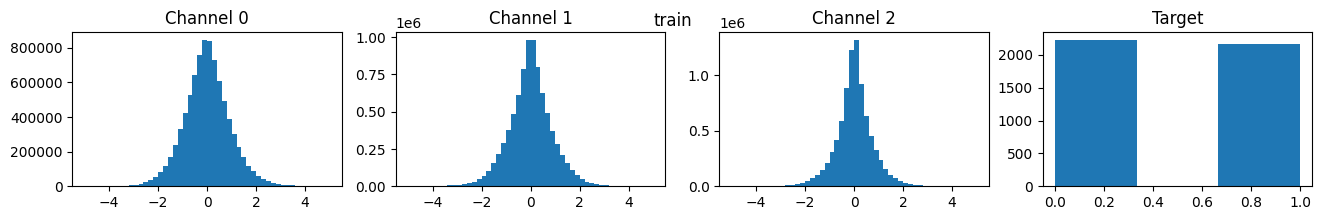

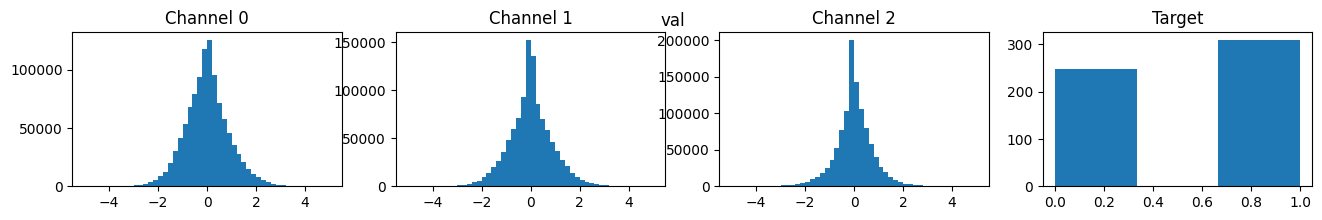

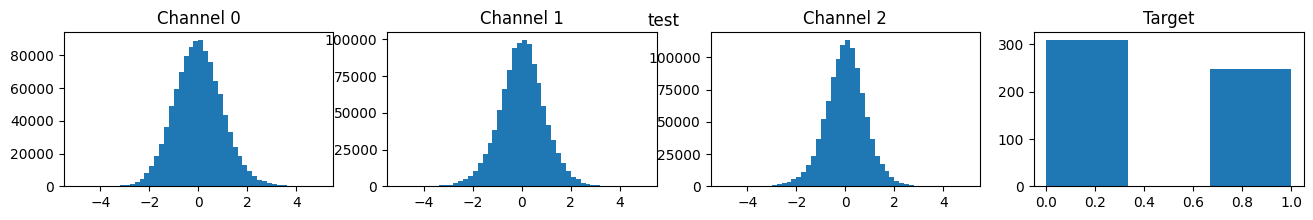

In [11]:
dataset_hists(train_set, val_set, test_set, chunk_bins=50, chunk_range=(-5, 5))
# dataset_hists(train_set, val_set, test_set, chunk_bins=50, chunk_range=(-5, 5), target_bins=10, target_range=(0, 100))

In [8]:
for file in os.listdir(DEPR_ANON_DIRECTORY + "fz_cz_pz/"):
    with open(DEPR_ANON_DIRECTORY + "fz_cz_pz/" + file, "rb") as f: dataset = pickle.load(f)
    print(file, len(dataset))

dataset_128_15.0.pkl 712
dataset_128_10.0.pkl 1068
dataset_128_30.0_3.0.pkl 1958
dataset_128_60.0_6.0.pkl 178
dataset_128_60.0.pkl 178
dataset_128_15.0_1.5.pkl 5518
dataset_128_1.0_0.1.pkl 112137
dataset_128_5.0.pkl 2136
dataset_128_30.0.pkl 356
dataset_128_5.0_0.5.pkl 19758
dataset_128_10.0_1.0.pkl 9078
dataset_128_1.0.pkl 10679
